In [254]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [255]:
ETHUSD = yf.download("ETH-USD",start = "2015-07-30", end = "2023-06-19")

[*********************100%***********************]  1 of 1 completed


In [256]:
ETHUSD

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,1650.519287,7462905534
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,1665.519775,7328564880
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,1716.668823,6281023479


In [257]:
type(ETHUSD)

pandas.core.frame.DataFrame

In [258]:
ETHUSD.drop(["Adj Close"],axis = 1,inplace = True)

In [259]:
ETHUSD

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479


In [260]:
ETHUSD.to_csv("ETHUSD.csv")

In [261]:
df = pd.read_csv("ETHUSD.csv", index_col = [0], parse_dates = [0])

In [262]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479


In [263]:
projection = 10
df['Prediction'] = df['Close'].shift(-projection)

In [264]:
df

,Open,High,Low,Close,Volume,Prediction
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,354.385986
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,366.730011
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,360.401001
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,380.652008
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,410.165985
...,...,...,...,...,...,...
2023-06-14,1739.250122,1749.163208,1637.187744,1650.519287,7462905534,NaN
2023-06-15,1650.498169,1676.406616,1624.138306,1665.519775,7328564880,NaN
2023-06-16,1665.410645,1727.289551,1653.170898,1716.668823,6281023479,NaN


In [265]:
x = np.array(df['Close'])

In [266]:
x

array([ 320.88400269,  299.25299072,  314.68099976, ..., 1716.66882324,
       1727.20410156, 1720.57751465])

In [267]:
x = x[:-projection]

In [268]:
len(x)

2038

In [269]:
x

array([ 320.88400269,  299.25299072,  314.68099976, ..., 1884.49487305,
       1832.39599609, 1846.30187988])

In [270]:
y = np.array(df['Prediction'])

In [271]:
y = y[:-projection]

In [272]:
y

array([ 354.38598633,  366.73001099,  360.40100098, ..., 1716.66882324,
       1727.20410156, 1720.57751465])

In [273]:
len(y)

2038

In [274]:
A = [[] for i in range(2038)]
for i in range(len(A)):
  A[i].append(x[i])
  A[i].append(1)

In [275]:
A = np.matrix(A)
A.shape

(2038, 2)

In [276]:
A_pseudo = np.linalg.inv(np.transpose(A) * A) * np.transpose(A)
A_pseudo.shape

(2, 2038)

In [277]:
p = A_pseudo * np.transpose(np.matrix(y))

In [278]:
p

matrix([[ 0.97755283],
        [33.28849651]])

In [279]:
y_pred = p[0] * 1890.513550 + p[1]

In [280]:
y_pred

matrix([[1881.36537626]])

In [281]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [282]:
y_train

array([ 303.09997559, 1366.77001953,  430.07400513, ...,  260.90328979,
       1874.2286377 , 1067.73071289])

In [283]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [284]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [285]:
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [286]:
linReg_confidence = linReg.score(x_test,y_test)
print("Linear Regression confidence : ", linReg_confidence)

Linear Regression confidence :  0.9470204008235722


In [287]:
pd.DataFrame(y_test)

,0
0,915.784973
1,1924.685425
2,200.689056
3,695.815979
4,265.391266
...,...
403,1703.507080
404,3031.067139
405,4340.763672
406,284.105011


In [288]:
x_projection = np.array(df["Close"])[-projection:]

In [289]:
x_projection

array([1840.22521973, 1752.38476562, 1753.4152832 , 1742.52868652,
       1739.03759766, 1650.51928711, 1665.51977539, 1716.66882324,
       1727.20410156, 1720.57751465])

In [290]:
pd.DataFrame(x_projection)

,0
0,1840.225220
1,1752.384766
2,1753.415283
3,1742.528687
4,1739.037598
5,1650.519287
6,1665.519775
7,1716.668823
8,1727.204102
9,1720.577515


In [291]:
y_pred = p[0] * 1716.668823 + p[1]

In [292]:
y_pred

matrix([[1711.42297059]])

In [293]:
x_projection = x_projection.reshape(-1,1)
y_prediction = linReg.predict(x_projection)

In [294]:
y_prediction

array([[1840.12438849],
       [1753.73218491],
       [1754.74571205],
       [1744.03860579],
       [1740.60507549],
       [1653.54619148],
       [1668.29936245],
       [1718.60510142],
       [1728.96668161],
       [1722.44934912]])

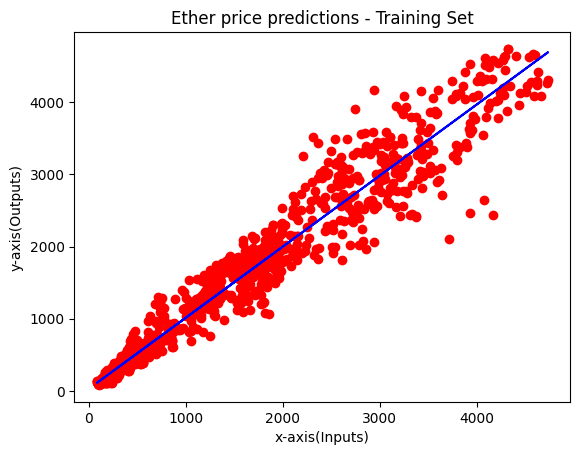

In [295]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train, linReg.predict(x_train),color="blue")
plt.title("Ether price predictions - Training Set")
plt.xlabel("x-axis(Inputs)")
plt.ylabel("y-axis(Outputs)")
plt.show()

Text(0, 0.5, 'y-axis(Outputs)')

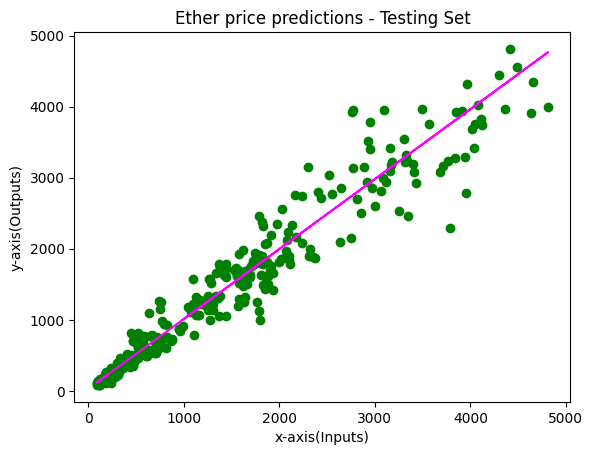

In [296]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,linReg.predict(x_test),color="magenta")
plt.title("Ether price predictions - Testing Set")
plt.xlabel("x-axis(Inputs)")
plt.ylabel("y-axis(Outputs)")